In [ ]:
# Data Inspection
import pandas as pd
import zipfile

# Load and inspect the dataset
zip_file = "/content/sep100.csv (1).zip"
with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall("/content/")

file_path = "/content/sep100.csv"  # Update the path if necessary
data = pd.read_csv(file_path)

print("Original Data Shape:", data.shape)
print("Columns in Original Data:", data.columns)
print("Missing Values in Original Data:")
print(data.isnull().sum())
print("Data Head:")
print(data.head())


Original Data Shape: (5786, 102)
Columns in Original Data: Index(['Date', 'AAPL', 'VZ', 'WBA', 'WFC', 'WMT', 'XOM', 'ABT', 'ADBE', 'AIG',
       ...
       'TMUS', 'TSLA', 'TXN', 'UNH', 'UNP', 'UPS', 'USB', 'V', 'ABBV', 'ACN'],
      dtype='object', length=102)
Missing Values in Original Data:
Date       0
AAPL       0
VZ         0
WBA        0
WFC        0
        ... 
UPS        0
USB        0
V       1930
ABBV    3136
ACN      256
Length: 102, dtype: int64
Data Head:
                  Date      AAPL         VZ       WBA       WFC       WMT  \
0  2000-07-13 00:00:00  1.008929  46.315121  30.93750  21.40625  59.12500   
1  2000-07-14 00:00:00  1.030134  44.516476  31.25000  21.84375  59.50000   
2  2000-07-17 00:00:00  1.041295  44.516476  31.21875  21.68750  60.71875   
3  2000-07-18 00:00:00  1.022321  43.898193  31.18750  21.03125  60.06250   
4  2000-07-19 00:00:00  0.940848  42.268169  31.31250  21.09375  60.00000   

        XOM        ABT       ADBE          AIG  ...  TMUS  TSL

In [ ]:
# Inspect Missing Data More Closely
# Summary of missing values by column
missing_values_summary = data.isnull().sum()
print("Missing Values Summary:")
print(missing_values_summary[missing_values_summary > 0])

# Check rows with missing values
print("Rows with Missing Values:")
print(data[data.isnull().any(axis=1)].head())



Missing Values Summary:
AVGO     2279
BRK.B    5786
CHTR     2383
CRM       989
DOW      4699
FB       5786
GM       2604
GOOG     1029
GOOGL    1029
KHC      3766
MA       1474
MDLZ      231
NFLX      465
PM       1928
PYPL     3766
TMUS     1699
TSLA     2504
V        1930
ABBV     3136
ACN       256
dtype: int64
Rows with Missing Values:
                  Date      AAPL         VZ       WBA       WFC       WMT  \
0  2000-07-13 00:00:00  1.008929  46.315121  30.93750  21.40625  59.12500   
1  2000-07-14 00:00:00  1.030134  44.516476  31.25000  21.84375  59.50000   
2  2000-07-17 00:00:00  1.041295  44.516476  31.21875  21.68750  60.71875   
3  2000-07-18 00:00:00  1.022321  43.898193  31.18750  21.03125  60.06250   
4  2000-07-19 00:00:00  0.940848  42.268169  31.31250  21.09375  60.00000   

        XOM        ABT       ADBE          AIG  ...  TMUS  TSLA      TXN  \
0  39.00000  19.583302  34.468750  1603.333374  ...   NaN   NaN  70.8750   
1  38.78125  19.078287  34.046875  1598.33

In [ ]:
# Handle Missing Values Carefully

# Drop columns with more than a certain threshold of missing values
threshold = 0.5  # Example: drop columns with more than 50% missing values
cleaned_data = data.dropna(axis=1, thresh=len(data) * (1 - threshold))
print("Cleaned Data Shape after dropping columns:", cleaned_data.shape)
print("Columns in Cleaned Data:", cleaned_data.columns)


Cleaned Data Shape after dropping columns: (5786, 96)
Columns in Cleaned Data: Index(['Date', 'AAPL', 'VZ', 'WBA', 'WFC', 'WMT', 'XOM', 'ABT', 'ADBE', 'AIG',
       'AMGN', 'AMT', 'AMZN', 'AVGO', 'AXP', 'BA', 'BAC', 'BIIB', 'BK', 'BKNG',
       'BLK', 'BMY', 'C', 'CAT', 'CHTR', 'CL', 'CMCSA', 'COF', 'COP', 'COST',
       'CRM', 'CSCO', 'CVS', 'CVX', 'DD', 'DHR', 'DIS', 'DUK', 'EMR', 'EXC',
       'F', 'FDX', 'GD', 'GE', 'GILD', 'GM', 'GOOG', 'GOOGL', 'GS', 'HD',
       'HON', 'IBM', 'INTC', 'JNJ', 'JPM', 'KO', 'LIN', 'LLY', 'LMT', 'LOW',
       'MA', 'MCD', 'MDLZ', 'MDT', 'MET', 'MMM', 'MO', 'MRK', 'MS', 'MSFT',
       'NEE', 'NFLX', 'NKE', 'NVDA', 'ORCL', 'PEP', 'PFE', 'PG', 'PM', 'QCOM',
       'RTX', 'SBUX', 'SO', 'SPG', 'T', 'TGT', 'TMO', 'TMUS', 'TSLA', 'TXN',
       'UNH', 'UNP', 'UPS', 'USB', 'V', 'ACN'],
      dtype='object')


In [ ]:
# Drop rows with missing values in specific columns
important_columns = ['AAPL', 'VZ']  # Replace with relevant columns
cleaned_data = data.dropna(subset=important_columns)
print("Cleaned Data Shape after dropping rows:", cleaned_data.shape)
print("Columns in Cleaned Data:", cleaned_data.columns)


Cleaned Data Shape after dropping rows: (5786, 102)
Columns in Cleaned Data: Index(['Date', 'AAPL', 'VZ', 'WBA', 'WFC', 'WMT', 'XOM', 'ABT', 'ADBE', 'AIG',
       ...
       'TMUS', 'TSLA', 'TXN', 'UNH', 'UNP', 'UPS', 'USB', 'V', 'ABBV', 'ACN'],
      dtype='object', length=102)


In [ ]:
# Recheck Data After Cleaning
print("Cleaned Data Shape:", cleaned_data.shape)
print("Columns in Cleaned Data:", cleaned_data.columns)
print("Cleaned Data Head:")
print(cleaned_data.head())


Cleaned Data Shape: (5786, 102)
Columns in Cleaned Data: Index(['Date', 'AAPL', 'VZ', 'WBA', 'WFC', 'WMT', 'XOM', 'ABT', 'ADBE', 'AIG',
       ...
       'TMUS', 'TSLA', 'TXN', 'UNH', 'UNP', 'UPS', 'USB', 'V', 'ABBV', 'ACN'],
      dtype='object', length=102)
Cleaned Data Head:
                  Date      AAPL         VZ       WBA       WFC       WMT  \
0  2000-07-13 00:00:00  1.008929  46.315121  30.93750  21.40625  59.12500   
1  2000-07-14 00:00:00  1.030134  44.516476  31.25000  21.84375  59.50000   
2  2000-07-17 00:00:00  1.041295  44.516476  31.21875  21.68750  60.71875   
3  2000-07-18 00:00:00  1.022321  43.898193  31.18750  21.03125  60.06250   
4  2000-07-19 00:00:00  0.940848  42.268169  31.31250  21.09375  60.00000   

        XOM        ABT       ADBE          AIG  ...  TMUS  TSLA      TXN  \
0  39.00000  19.583302  34.468750  1603.333374  ...   NaN   NaN  70.8750   
1  38.78125  19.078287  34.046875  1598.333374  ...   NaN   NaN  72.5000   
2  39.37500  19.078287  33.765

In [ ]:
# Proceed with Data Transformation if Data Exists
from sklearn.preprocessing import MinMaxScaler

# Ensure selected columns exist
selected_columns = ['AAPL', 'VZ']  # Replace with actual column names
if not all(col in cleaned_data.columns for col in selected_columns):
    raise ValueError("One or more selected columns are not in the dataframe")

# Feature Scaling
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(cleaned_data[selected_columns])
scaled_data = pd.DataFrame(scaled_features, columns=[f'{col}_scaled' for col in selected_columns])

# Add scaled features back to the DataFrame
cleaned_data = pd.concat([cleaned_data.reset_index(drop=True), scaled_data], axis=1)

# Create new features
cleaned_data['percent_change'] = (cleaned_data[selected_columns[0]] - cleaned_data[selected_columns[1]]) / cleaned_data[selected_columns[1]] * 100

# Define classification function
def classify_movement(row):
    if row[selected_columns[1]] == 0:
        return 'Undefined'
    percent_change = (row[selected_columns[0]] - row[selected_columns[1]]) / row[selected_columns[1]] * 100
    if percent_change > 2:
        return 'Strong Bullish'
    elif percent_change > 0.5:
        return 'Bullish'
    elif percent_change < -2:
        return 'Strong Bearish'
    elif percent_change < -0.5:
        return 'Bearish'
    else:
        return 'Neutral'

# Apply classification
cleaned_data['movement_class'] = cleaned_data.apply(classify_movement, axis=1)

print("Transformed Data Head:")
print(cleaned_data.head())


Transformed Data Head:
                  Date      AAPL         VZ       WBA       WFC       WMT  \
0  2000-07-13 00:00:00  1.008929  46.315121  30.93750  21.40625  59.12500   
1  2000-07-14 00:00:00  1.030134  44.516476  31.25000  21.84375  59.50000   
2  2000-07-17 00:00:00  1.041295  44.516476  31.21875  21.68750  60.71875   
3  2000-07-18 00:00:00  1.022321  43.898193  31.18750  21.03125  60.06250   
4  2000-07-19 00:00:00  0.940848  42.268169  31.31250  21.09375  60.00000   

        XOM        ABT       ADBE          AIG  ...        UNP      UPS  \
0  39.00000  19.583302  34.468750  1603.333374  ...  10.250000  60.3125   
1  38.78125  19.078287  34.046875  1598.333374  ...  10.875000  60.8750   
2  39.37500  19.078287  33.765625  1591.666626  ...  11.015625  60.4375   
3  39.09375  18.825781  32.734375  1589.166626  ...  10.984375  60.7500   
4  39.34375  18.461048  32.484375  1590.000000  ...  10.578125  61.2500   

       USB   V  ABBV  ACN  AAPL_scaled  VZ_scaled  percent_chan

In [ ]:
# Data Splitting and Validation
from sklearn.model_selection import train_test_split

# Ensure there are enough rows to split
if cleaned_data.empty or len(cleaned_data) < 2:
    raise ValueError("The cleaned_data DataFrame is either empty or has too few rows to split.")

# Define features and target variable
X = cleaned_data.drop(columns=['movement_class'])
y = cleaned_data['movement_class']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training Set Shape:", X_train.shape, y_train.shape)
print("Testing Set Shape:", X_test.shape, y_test.shape)

# Validate data
print("NaN Values in Training Set:")
print(X_train.isnull().sum())

print("Target Variable Distribution in Testing Set:")
print(y_test.value_counts())


Training Set Shape: (4628, 105) (4628,)
Testing Set Shape: (1158, 105) (1158,)
NaN Values in Training Set:
Date                 0
AAPL                 0
VZ                   0
WBA                  0
WFC                  0
                  ... 
ABBV              2496
ACN                192
AAPL_scaled          0
VZ_scaled            0
percent_change       0
Length: 105, dtype: int64
Target Variable Distribution in Testing Set:
movement_class
Strong Bearish    960
Strong Bullish    188
Bullish             4
Bearish             3
Neutral             3
Name: count, dtype: int64


In [ ]:
!pip install matplotlib-venn
!pip install mplfinance
# https://pypi.python.org/pypi/pydot
!apt-get -qq install -y graphviz && pip install pydot
!pip install cartopy
!pip install yfinance mplfinance seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 31.7 MB/s eta 0:00:00


Kernel 1 - MSE: 4.401523161230386
Optimized kernel parameters: 103**2 * RBF(length_scale=257)
Kernel 2 - MSE: 4.433446425990684
Optimized kernel parameters: 9.7**2 * RBF(length_scale=[17, 1e+05, 1e+05, 1e+05])
Kernel 3 - MSE: 4.390717018660144
Optimized kernel parameters: 316**2 * Matern(length_scale=2.04e+03, nu=1.5)
Kernel 4 - MSE: 4.401547344519219
Optimized kernel parameters: WhiteKernel(noise_level=1e-05) + 103**2 * RBF(length_scale=257)

Best Gaussian Process Regressor:
MSE: 4.390717018660144
Kernel: 316**2 * Matern(length_scale=2.04e+03, nu=1.5)
Predictions: [250.07172236 260.49938765 178.10965867 134.38258937 343.24877316
 151.25881226 299.14996386 143.71681459 131.18246168 251.55655158
 142.24279408 194.54974134 123.01758902 249.36150807 165.40329971
 291.15827667 251.49363772 146.24670387 153.64051243 236.149974
 185.91780991 241.88998524 221.2197361  304.7640917  163.78188621
 176.77561678 152.65975329 130.03514591 170.64043353 252.51313103
 327.41156578 137.52826954 124.694

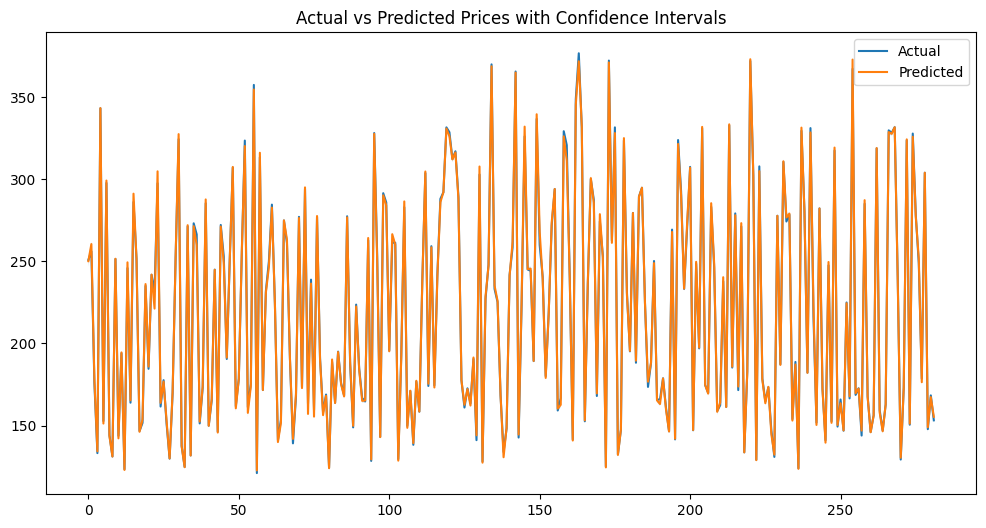

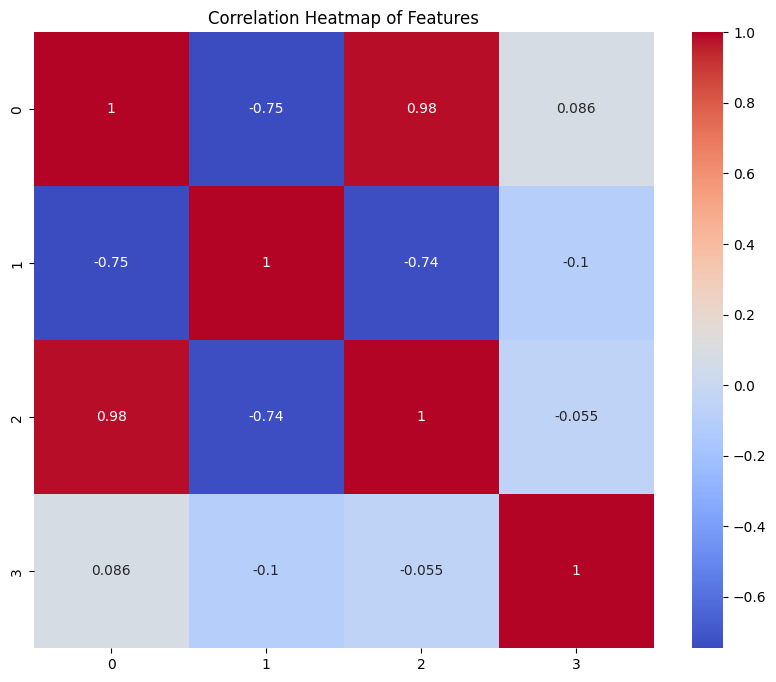

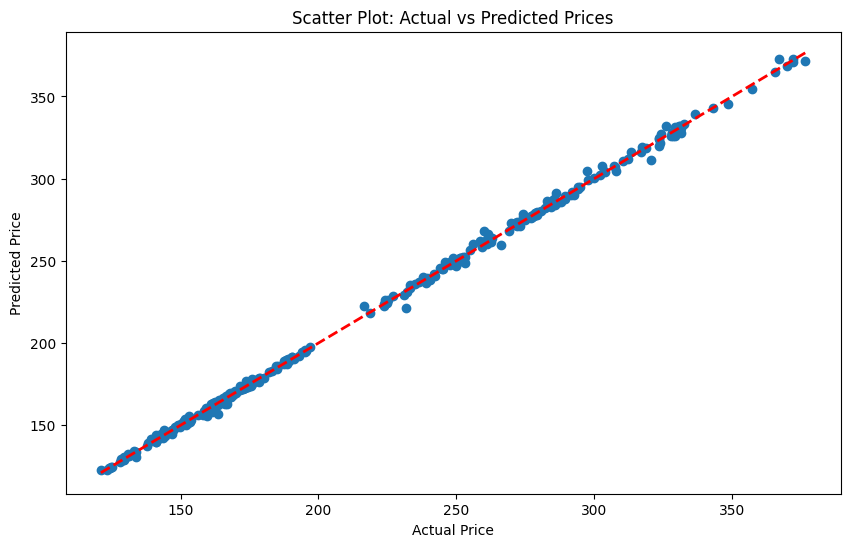

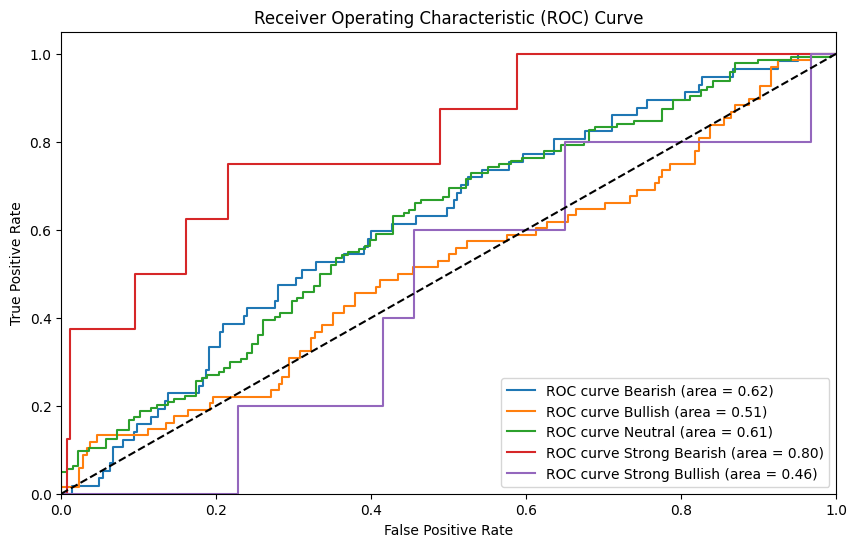

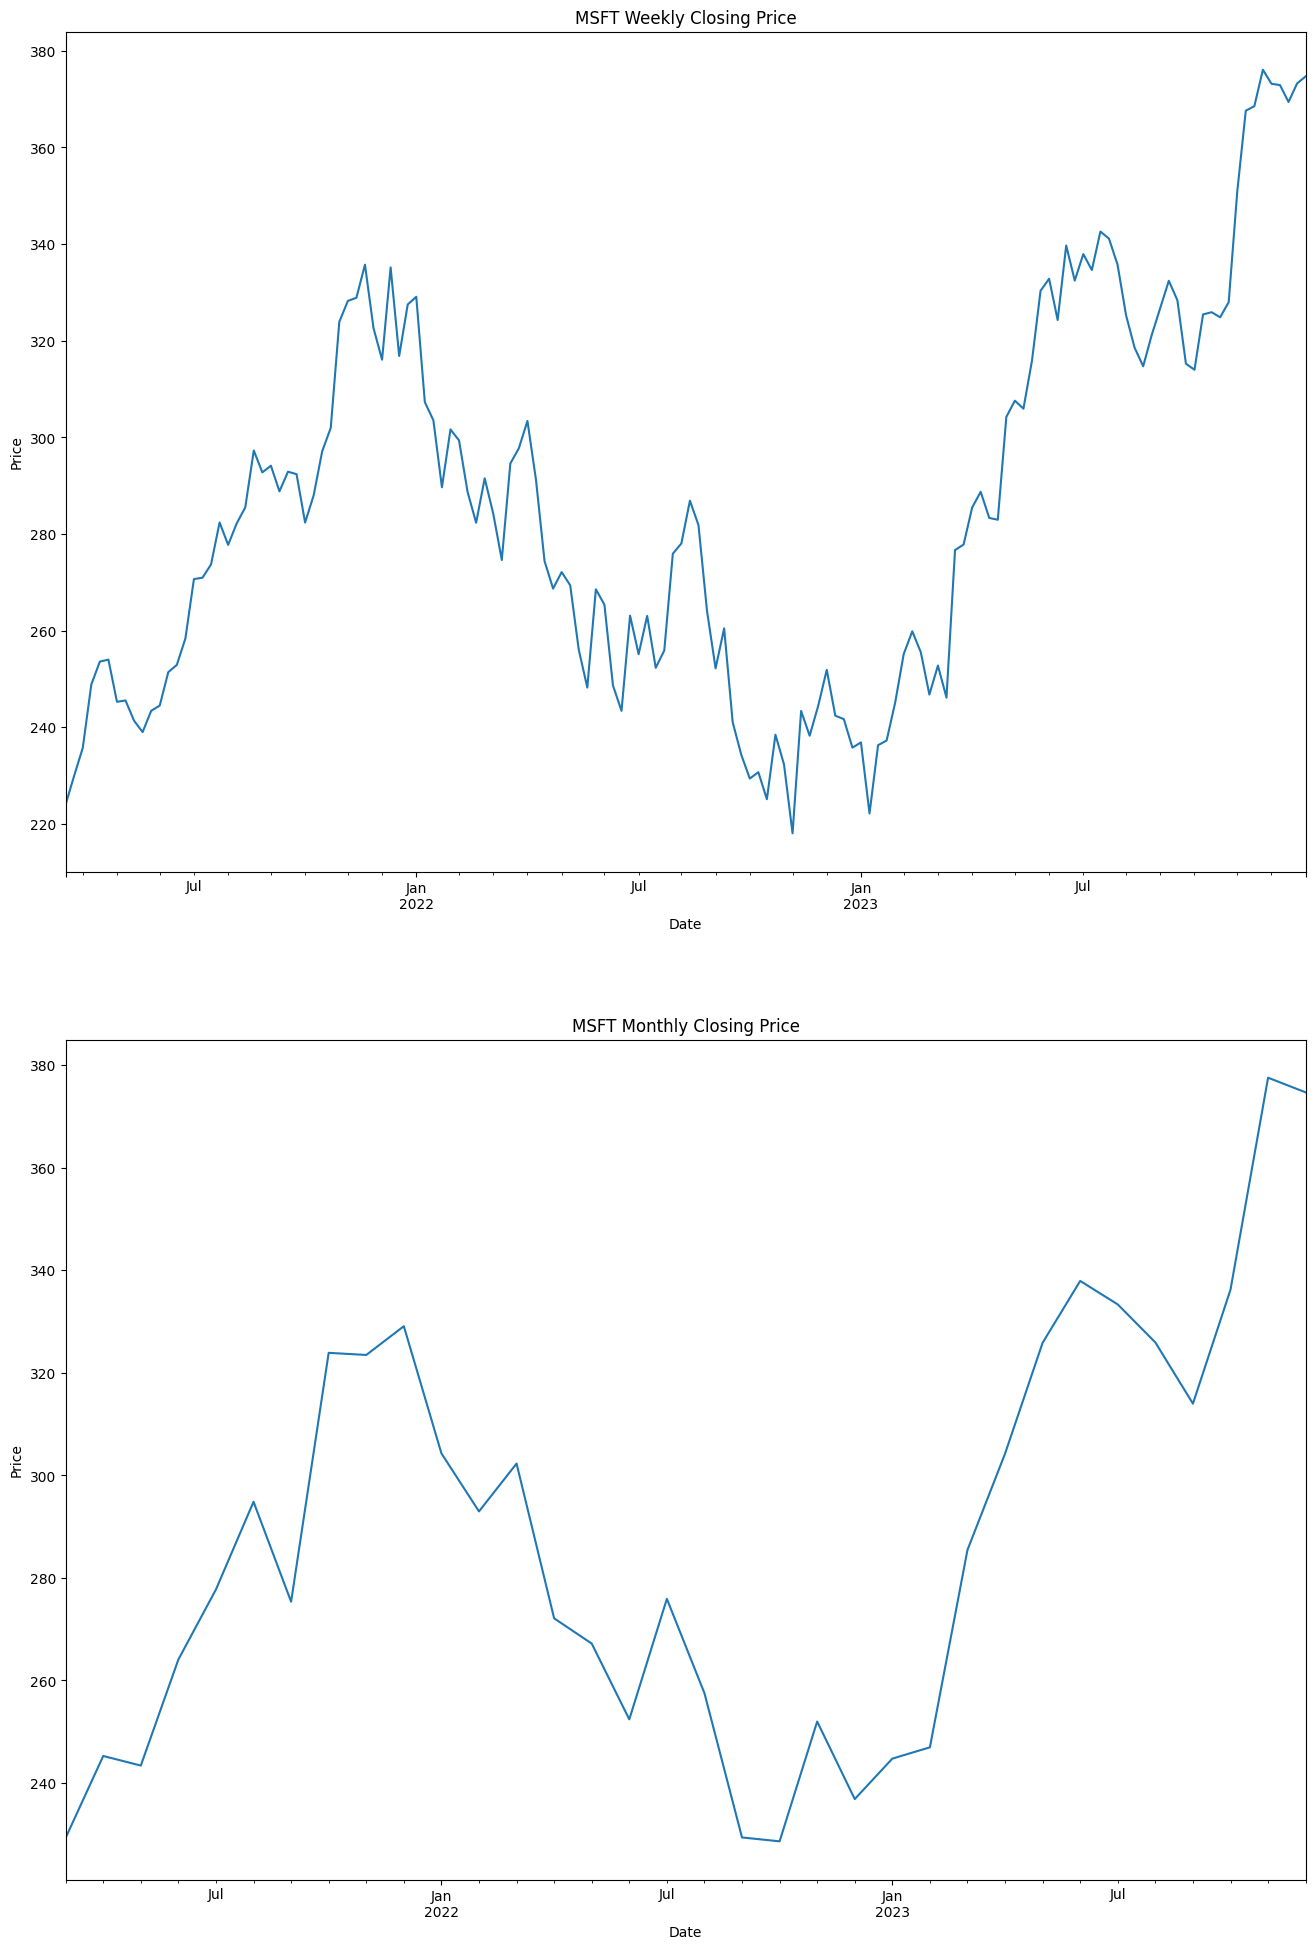

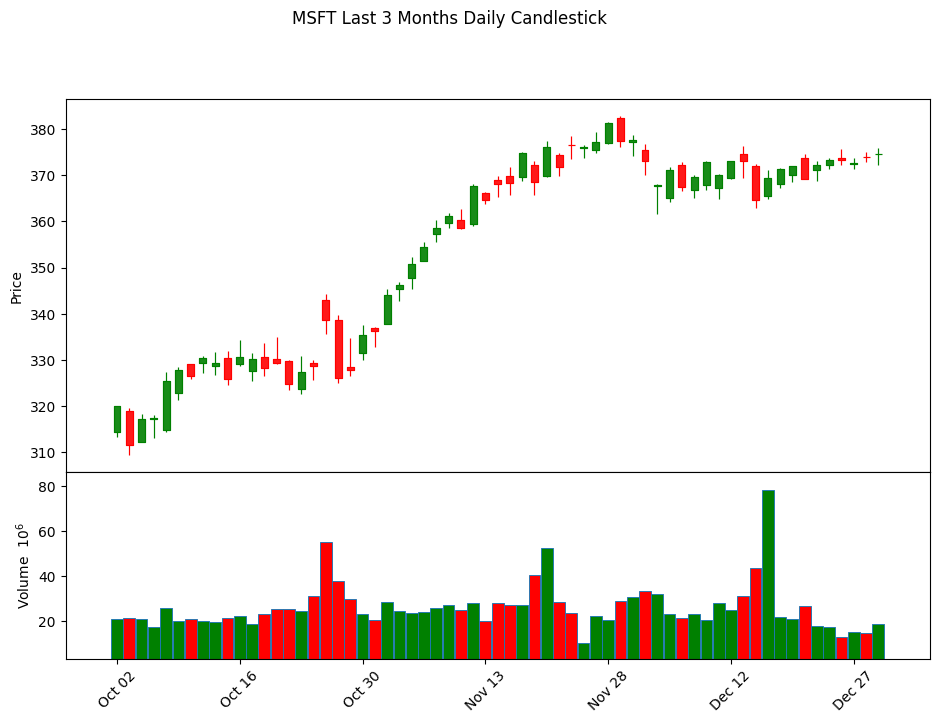

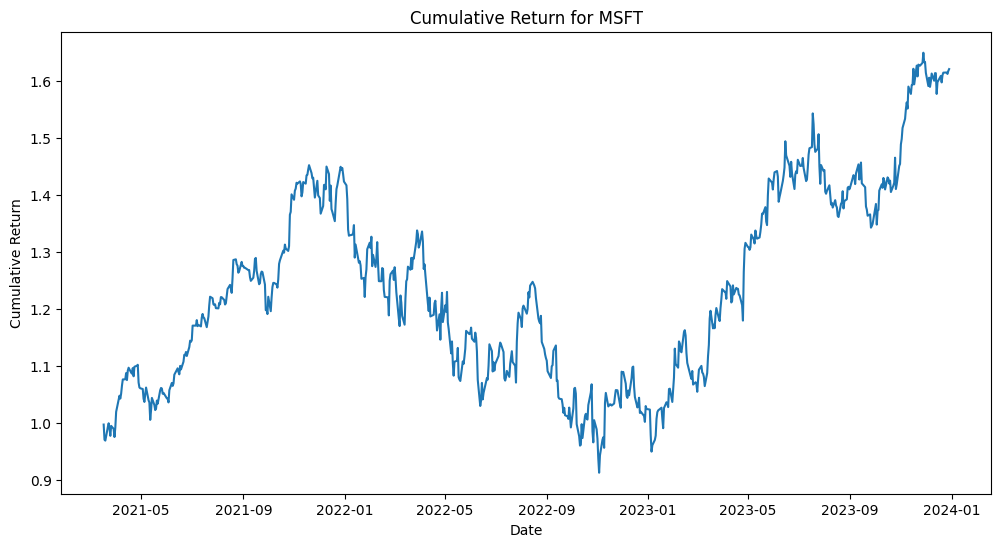

In [ ]:
# Import necessary libraries
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.gaussian_process import GaussianProcessRegressor, GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.metrics import mean_squared_error, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import mplfinance as mpf
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)  # when warning occerr

# Step 1: Data Collection
symbols = ['AAPL', 'MSFT']  # Using Apple and Microsoft as examples
start_date = '2021-01-01'  # Changed to start from 2021
end_date = '2024-01-01'  # Changed to end at 2024

data = {}
for symbol in symbols:
    try:
        ticker = yf.Ticker(symbol)
        df = ticker.history(start=start_date, end=end_date)
        if df.empty:
            print(f"No data available for {symbol}")
        else:
            data[symbol] = df
    except Exception as e:
        print(f"Error fetching data for {symbol}: {e}")

if not data:
    raise ValueError("No data was successfully retrieved for any symbol")

# Step 2: Data Preprocessing
def preprocess_data(df):
    # Calculate technical indicators
    df['50_day_MA'] = df['Close'].rolling(window=50).mean()
    df['RSI'] = calculate_rsi(df['Close'])

    # Handle missing values
    df.dropna(inplace=True)

    # Create features and target
    features = ['Close', 'Volume', '50_day_MA', 'RSI']
    target = 'Open'

    X = df[features].values
    y = df[target].shift(-1).values[:-1]  # Next day's open
    X = X[:-1]  # Remove last row to align with y

    return X, y

def calculate_rsi(prices, period=14):
    delta = prices.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=period).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=period).mean()
    rs = gain / loss.replace(0, np.finfo(float).eps)  # Avoid division by zero
    return 100 - (100 / (1 + rs))

# Preprocess data for each symbol
X_all, y_all = [], []
for symbol, df in data.items():
    if len(df) > 50:  # Ensure we have enough data for 50-day MA
        X, y = preprocess_data(df)
        X_all.append(X)
        y_all.append(y)
    else:
        print(f"Not enough data for {symbol}")

if not X_all or not y_all:
    raise ValueError("No data left after preprocessing")

X_all = np.vstack(X_all)
y_all = np.concatenate(y_all)

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_all)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_all, test_size=0.2, random_state=42)

# Step 3: Gaussian Process Regression
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C, WhiteKernel, Matern
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.metrics import mean_squared_error
import warnings

# Suppress warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

# Check for NaN or infinite values in training data
if np.any(np.isnan(X_train)) or np.any(np.isinf(X_train)):
    raise ValueError("X_train contains NaN or infinite values.")
if np.any(np.isnan(y_train)) or np.any(np.isinf(y_train)):
    raise ValueError("y_train contains NaN or infinite values.")
if len(X_train) < 10 or len(y_train) < 10:
    raise ValueError("Not enough training data")

# Try different kernel configurations
kernels = [
    C(1.0) * RBF(length_scale=1.0, length_scale_bounds=(1e-5, 1e5)),
    C(1.0, (1e-5, 1e5)) * RBF(length_scale=[1.0] * X_train.shape[1], length_scale_bounds=(1e-5, 1e5)),
    C(1.0) * Matern(length_scale=1.0, nu=1.5),
    WhiteKernel() + C(1.0) * RBF(length_scale=1.0)
]

best_mse = float('inf')
best_gpr = None

for i, kernel in enumerate(kernels):
    try:
        gpr = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=5,
                                       alpha=1e-2, normalize_y=True, random_state=42)
        gpr.fit(X_train, y_train)
        y_pred, y_std = gpr.predict(X_test, return_std=True)
        mse = mean_squared_error(y_test, y_pred)

        print(f"Kernel {i+1} - MSE: {mse}")
        print(f"Optimized kernel parameters: {gpr.kernel_}")

        if mse < best_mse:
            best_mse = mse
            best_gpr = gpr
    except Exception as e:
        print(f"Error with kernel {i+1}: {e}")

if best_gpr is not None:
    print("\nBest Gaussian Process Regressor:")
    print(f"MSE: {best_mse}")
    print(f"Kernel: {best_gpr.kernel_}")

    # Make predictions with the best model
    y_pred, y_std = best_gpr.predict(X_test, return_std=True)
else:
    print("No successful Gaussian Process model was found.")
    # You might want to consider a different model entirely at this point
    # For example, you could try a simple linear regression:
    from sklearn.linear_model import LinearRegression
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f"Linear Regression MSE: {mse}")

# Check predictions
print("Predictions:", y_pred)
if 'y_std' in locals():
    print("Standard Deviations:", y_std)

# Step 4: Classification
def classify_movement(actual, predicted):
    change = (predicted - actual) / actual
    if change > 0.02:
        return 'Strong Bullish'
    elif 0.005 < change <= 0.02:
        return 'Bullish'
    elif -0.005 <= change <= 0.005:
        return 'Neutral'
    elif -0.02 <= change < -0.005:
        return 'Bearish'
    else:
        return 'Strong Bearish'

y_class = np.array([classify_movement(a, p) for a, p in zip(y_test, y_pred)])

# Gaussian Process Classification
classification_kernel = RBF(length_scale=1.0)
gpc = GaussianProcessClassifier(kernel=classification_kernel, random_state=42, max_iter_predict=100)

try:
    gpc.fit(X_test, y_class)
except Exception as e:
    print(f"Error during GPC fitting: {e}")

# Step 5: Visualizations
# Actual vs Predicted Prices
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.fill_between(range(len(y_pred)), y_pred - 1.96 * y_std, y_pred + 1.96 * y_std, alpha=0.2)
plt.title('Actual vs Predicted Prices with Confidence Intervals')
plt.legend()
plt.show()

# Correlation heatmap
corr_matrix = np.corrcoef(X_scaled.T)
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Features')
plt.show()

# Scatter plot with regression line
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Scatter Plot: Actual vs Predicted Prices')
plt.show()

# ROC curve
try:
    y_score = gpc.predict_proba(X_test)
    unique_classes = np.unique(y_class)
    plt.figure(figsize=(10, 6))
    for i, class_label in enumerate(unique_classes):
        y_true_binary = (y_class == class_label).astype(int)
        fpr, tpr, _ = roc_curve(y_true_binary, y_score[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'ROC curve {class_label} (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()
except Exception as e:
    print(f"Error during ROC Curve visualization: {e}")

# Candlestick chart (using the first symbol as an example)
# Assuming 'symbol' and 'df' are already defined
try:
    # Resample data to weekly and monthly for overall trend
    df_weekly = df.resample('W').agg({
        'Open': 'first',
        'High': 'max',
        'Low': 'min',
        'Close': 'last',
        'Volume': 'sum'
    })

    df_monthly = df.resample('M').agg({
        'Open': 'first',
        'High': 'max',
        'Low': 'min',
        'Close': 'last',
        'Volume': 'sum'
    })

    # Create a figure with three subplots
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 24))

    # Plot weekly data as line chart
    df_weekly['Close'].plot(ax=ax1)
    ax1.set_title(f'{symbol} Weekly Closing Price')
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Price')

    # Plot monthly data as line chart
    df_monthly['Close'].plot(ax=ax2)
    ax2.set_title(f'{symbol} Monthly Closing Price')
    ax2.set_xlabel('Date')
    ax2.set_ylabel('Price')

    # Plot last 3 months of daily data as candlestick chart
    df_last_3months = df.last('3M')

    # Create a custom style
    mc = mpf.make_marketcolors(up='g', down='r', inherit=True)
    s = mpf.make_mpf_style(marketcolors=mc)

    # Plot the chart
    mpf.plot(df_last_3months, type='candle', style=s,
             volume=True, figsize=(16, 24), panel_ratios=(2, 1),
             title='MSFT Last 3 Months Daily Candlestick')

    # Adjust layout and display
    plt.show()

    # Cumulative return chart
    returns = df['Close'].pct_change()
    cumulative_returns = (1 + returns).cumprod()
    plt.figure(figsize=(12, 6))
    plt.plot(cumulative_returns.index, cumulative_returns)
    plt.title(f'Cumulative Return for {symbol}')
    plt.xlabel('Date')
    plt.ylabel('Cumulative Return')
    plt.show()

except Exception as e:
    print(f"Error during Chart visualization: {e}")
